In [1]:
import numpy as np
import pandas as pd
import os
import re
import scipy.stats as st
import matplotlib.pyplot as plt
os.listdir()

['.git', '.ipynb_checkpoints', 'Raport.ipynb', 'README.md', 'Spotify2019.xlsx']

Będę w kodzie liczył z takich danych jak 
ilościowe:
Energy,Popularity,Danceability, Beats.Per.Minute
porządkowe - przekształcę popularity na dziesiątki(jakie piosenki w pierwszej dziesiątce, drugiej, trzeciej
kategorialne - Genres i Artists.Name
Nie ma braków danych, spełnia warunki formatu tidy

In [2]:
name = "Spotify2019.xlsx"
file = pd.ExcelFile(name)
print(file.sheet_names)
data = file.parse("Dane")


['Dane']


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
Column1             50 non-null int64
Track.Name          50 non-null object
Artist.Name         50 non-null object
Genre               50 non-null object
Beats.Per.Minute    50 non-null int64
Energy              50 non-null int64
Danceability        50 non-null int64
Loudness..dB..      50 non-null int64
Liveness            50 non-null int64
Valence.            50 non-null int64
Length.             50 non-null int64
Acousticness..      50 non-null int64
Speechiness.        50 non-null int64
Popularity          50 non-null int64
dtypes: int64(11), object(3)
memory usage: 5.6+ KB


In [4]:
data.head(9)

,Column1,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Seńorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87


In [5]:
data.shape ###wymiary

(50, 14)

In [6]:
data.describe() ### podstawowe wartości

,Column1,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,14.57738,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,1.00000,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,13.25000,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,25.50000,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,37.75000,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,50.00000,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


In [7]:
print("Artysci") 
#Jak dużo piosenek danych artystów pojawiło się w zbiorze
print(data["Artist.Name"].value_counts())
print("srednia:",data['Beats.Per.Minute'].mean())
#dominanta
print('dominansta:',data['Beats.Per.Minute'].mode())
#mediana
print('mediana:',data['Beats.Per.Minute'].median())
#Najczęściej występująca wartość
print(data['Genre'].mode())

Artysci
Ed Sheeran          4
Lil Nas X           2
Marshmello          2
Post Malone         2
Shawn Mendes        2
Ariana Grande       2
The Chainsmokers    2
J Balvin            2
Sech                2
Billie Eilish       2
Lauv                1
Lil Tecca           1
Y2K                 1
Tones and I         1
ROSALÍA             1
Lady Gaga           1
Maluma              1
Sam Smith           1
Lewis Capaldi       1
Khalid              1
Taylor Swift        1
Chris Brown         1
MEDUZA              1
Martin Garrix       1
Nicky Jam           1
DJ Snake            1
Jonas Brothers      1
Lunay               1
Katy Perry          1
Young Thug          1
Daddy Yankee        1
Drake               1
Bad Bunny           1
Lizzo               1
Anuel AA            1
Jhay Cortez         1
Ali Gatie           1
Kygo                1
Name: Artist.Name, dtype: int64
srednia: 120.06
dominansta: 0    176
dtype: int64
mediana: 104.5
0    dance pop
dtype: object


In [8]:
#warto zwrócić uwagę w raporcie na Eda Sheerana który jako jedyny ma 4 piosenki
#w top 50, później do niego wrócę
data['Genre'].unique()

array(['canadian pop', 'reggaeton flow', 'dance pop', 'pop', 'dfw rap',
       'trap music', 'country rap', 'electropop', 'reggaeton',
       'panamanian pop', 'canadian hip hop', 'latin', 'escape room',
       'pop house', 'australian pop', 'edm', 'atl hip hop', 'big room',
       'boy band', 'r&b en espanol', 'brostep'], dtype=object)

In [9]:
#Najczęściej pojawiąjące się nazwisko artysty
data['Artist.Name'].describe()

count             50
unique            38
top       Ed Sheeran
freq               4
Name: Artist.Name, dtype: object

In [10]:
#grupujemy według artysty, alfabetycznie
data.groupby("Artist.Name").mean()


,Column1,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
Artist.Name,,,,,,,,,,,
Ali Gatie,28.0,96.0,46.0,73.00,-7.0,19.0,40.00,213.0,37.00,3.0,89.00
Anuel AA,2.0,105.0,81.0,79.00,-4.0,8.0,61.00,302.0,8.00,9.0,92.00
Ariana Grande,17.5,165.0,56.0,59.00,-7.5,12.5,51.50,182.5,35.50,39.5,87.00
Bad Bunny,11.0,176.0,62.0,61.00,-5.0,24.0,24.00,251.0,60.00,31.0,93.00
Billie Eilish,17.5,135.0,44.0,68.50,-11.0,11.0,62.00,194.5,29.00,34.0,92.00
Chris Brown,16.0,93.0,45.0,70.00,-7.0,16.0,14.00,261.0,12.00,15.0,82.00
DJ Snake,12.0,96.0,71.0,82.00,-4.0,15.0,38.00,185.0,28.00,7.0,86.00
Daddy Yankee,29.0,94.0,86.0,74.00,-3.0,6.0,66.00,193.0,11.00,6.0,91.00
Drake,15.0,101.0,50.0,83.00,-4.0,12.0,10.00,205.0,10.00,5.0,92.00


In [11]:
st.pearsonr(data['Beats.Per.Minute'],data['Energy']) ### współczynnik Pearsona dla Beats.Per Minute i Energy

(0.04375559078974289, 0.7628672760900255)

In [12]:
#po sprawdzeniu w internecie okazuje się, że te dane wlaściwie nie są posortowane względem 
#popularności,więc to naprawiam

data  = data.sort_values("Popularity", ascending = False)

data = data.assign(place = range(1,51) )


In [13]:
s=data.head() ###top 5 wg popularności
s.to_clipboard()

In [14]:
print("Wypisane po kolei")
print(data["Genre"])
print("Wypisane względem ilości powtórzeń")
print(data["Genre"].value_counts()) 

Wypisane po kolei
9           electropop
4              dfw rap
10           reggaeton
14    canadian hip hop
1       reggaeton flow
6           trap music
36      panamanian pop
21         country rap
20           pop house
19         escape room
17             dfw rap
28               latin
23               latin
16               latin
7                  pop
41           dance pop
35            big room
34           dance pop
33         atl hip hop
32           reggaeton
31           dance pop
24          electropop
29               latin
27    canadian hip hop
48                 edm
40                 edm
44      r&b en espanol
45             brostep
46               latin
47             brostep
18    canadian hip hop
12                 pop
13      panamanian pop
37                 pop
8          country rap
42           dance pop
3                  pop
11           dance pop
2            dance pop
30                 edm
5                  pop
43                 pop
26      australi

In [15]:
data["Genre"] = data["Genre"].replace(".*pop.*","pop",regex = True)
data["Genre"] = data["Genre"].where(data["Genre"] == "pop","other")
#podmieniam podrodzaje muzyki takie jak "house pop" "panamian pop" na "pop"
#podmieniam wszystkie inne rodzaje muzyki na other, ponieważ zostało ich mało. Chcę sprawdzić czy zróżnicowanie pod względem
#kategorii jest różne czy takie samo dla popu i innych

other    27
pop      23
Name: Genre, dtype: int64


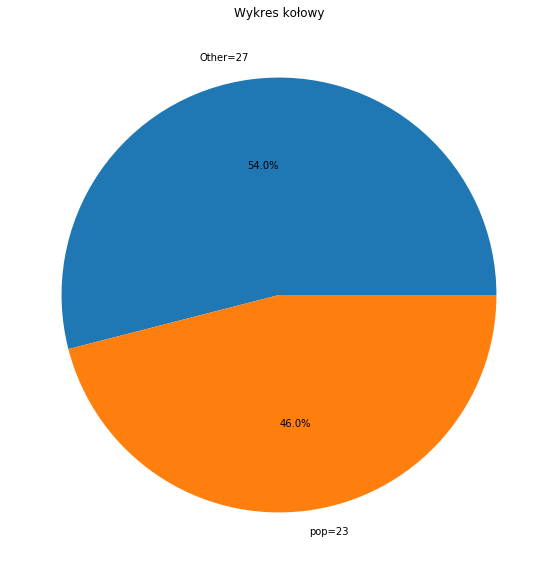

In [16]:
s = data["Genre"].value_counts() ### ilość popu i innych
print(s)
plt.figure(figsize=(10,10))
plt.pie(s, labels = ['Other=27', 'pop=23'],autopct='%1.1f%%')
plt.title('Wykres kołowy')
plt.show()


In [17]:
data.describe()

,Column1,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity,place
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000
mean,25.50000,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000,25.50000
std,14.57738,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489,14.57738
min,1.00000,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000,1.00000
25%,13.25000,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000,13.25000
50%,25.50000,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000,25.50000
75%,37.75000,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000,37.75000
max,50.00000,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000,50.00000


In [18]:
data.groupby("Genre")[["Energy","Danceability","Beats.Per.Minute"]].agg(['min','max','mean','std','count'])
#największe różnica średnich w Valance
x= ["Genre"]
y= data["Danceability"].agg('mean')
print(y)


71.38


In [19]:
data.head()

,Column1,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity,place
9,10,bad guy,Billie Eilish,pop,135,43,70,-11,10,56,194,33,38,95,1
4,5,Goodbyes (Feat. Young Thug),Post Malone,other,150,65,58,-4,11,18,175,45,7,94,2
10,11,Callaita,Bad Bunny,other,176,62,61,-5,24,24,251,60,31,93,3
14,15,Money In The Grave (Drake ft. Rick Ross),Drake,other,101,50,83,-4,12,10,205,10,5,92,4
1,2,China,Anuel AA,other,105,81,79,-4,8,61,302,8,9,92,5


In [20]:
print(data[["Track.Name","Artist.Name","place"]])
#po posortowaniu względem popularności

                                           Track.Name       Artist.Name  place
9                                             bad guy     Billie Eilish      1
4                         Goodbyes (Feat. Young Thug)       Post Malone      2
10                                           Callaita         Bad Bunny      3
14           Money In The Grave (Drake ft. Rick Ross)             Drake      4
1                                               China          Anuel AA      5
6                                              Ransom         Lil Tecca      6
36                                         Otro Trago              Sech      7
21                                             Panini         Lil Nas X      8
20                                Piece Of Your Heart            MEDUZA      9
19                                        Truth Hurts             Lizzo     10
17      Sunflower - Spider-Man: Into the Spider-Verse       Post Malone     11
28                                          Con Calm

In [21]:
#sprawdzam czy istnieje korelacja liniowa między Danceability a Popularity
st.pearsonr(data["Danceability"],data["Popularity"])

(-0.07141325258733469, 0.6221356203236242)

In [22]:
#^^ zwraca najpierw wartość ewentualnej korelacji a potem wartość p.
# dla powyższych danych p jest większe niż 0,05 więc nie odrzucamy hipotezy zerowej


In [23]:
st.pearsonr(data["Danceability"],data["Beats.Per.Minute"])

(-0.09418289163245999, 0.5153190831344472)

In [24]:
st.pearsonr(data["Beats.Per.Minute"],data["Popularity"])

(0.1960969180528969, 0.1723044341094892)

In [25]:
x = st.pearsonr(data["place"],data["Danceability"])

In [26]:
#szukam sobie dwóch różnych zmiennych dla których p-value będzie mniejsze od 0,05

for column_1 in data:
    for column_2 in data:
        try:
            x = st.pearsonr(data[column_1],data[column_2])
            if x[1]< 0.05 and abs(x[0]) >=0.5 and column_1 != column_2:
                print("Korelacja i wartość p dla:",column_1,",",column_2)
                print(st.pearsonr(data[column_1],data[column_2]))
        except:
            pass

Korelacja i wartość p dla: Beats.Per.Minute , Speechiness.
(0.5570518776006889, 2.6504561033530528e-05)
Korelacja i wartość p dla: Energy , Loudness..dB..
(0.670793566632685, 9.812894221975676e-08)
Korelacja i wartość p dla: Loudness..dB.. , Energy
(0.670793566632685, 9.812894221975676e-08)
Korelacja i wartość p dla: Speechiness. , Beats.Per.Minute
(0.5570518776006889, 2.6504561033530528e-05)
Korelacja i wartość p dla: Popularity , place
(-0.89784637908939, 1.0095918488815014e-18)
Korelacja i wartość p dla: place , Popularity
(-0.89784637908939, 1.0095918488815014e-18)


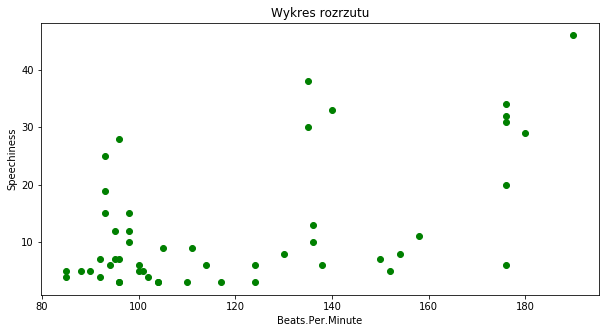

In [27]:
#powyżej widzimy, że dosyć spora korelacja jest między Energy i Loudness, Beats.Per.Minute i Speechiness, 
#Popularity i place się nie liczy tutaj bo place sam stworzyłem

x = data["Beats.Per.Minute"]
y = data['Speechiness.']
plt.figure(figsize=(10,5))

plt.plot(x,y, "go")
plt.xlabel("Beats.Per.Minute")
plt.ylabel("Speechiness")
plt.title('Wykres rozrzutu')
plt.show()
### Speechiness Beats per minutes



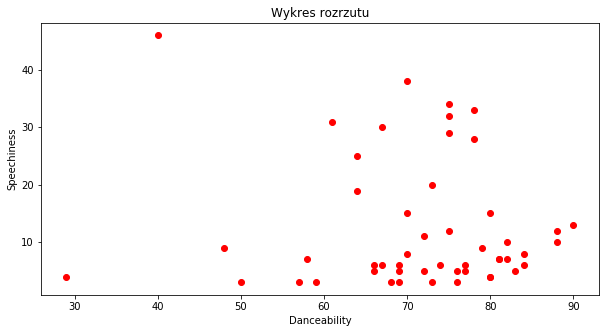

(-0.10347192169379557, 0.4745632525054967)

In [28]:
#Sprawdźcie czy współczynniki piosenek Eda Sheerana ( który ma najwięcej ppiosenek w top50)
#odbiegają mocno od średniej dla reszty piosenek z top 50

x = data["Danceability"]
y = data['Speechiness.']
plt.figure(figsize=(10,5))

plt.plot(x,y, "ro")
plt.xlabel("Danceability")
plt.ylabel("Speechiness")
plt.title('Wykres rozrzutu')
plt.show()
plt.show()
st.pearsonr(data["Danceability"],data["Speechiness."])

###Wy

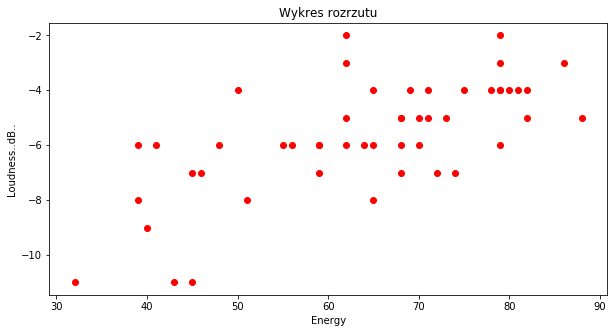

(0.670793566632685, 9.812894221975676e-08)

In [29]:
###Bets vs Speechinees V
###Danceability vs Spechiness V
###Energy 
plt.figure(figsize=(10,5))

x = data["Energy"]
y = data['Loudness..dB..']
plt.plot(x,y, "ro")
plt.xlabel("Energy")
plt.ylabel("Loudness..dB..")
plt.title('Wykres rozrzutu')
plt.show()

st.pearsonr(data["Energy"],data["Loudness..dB.."])


### Energy i Liveness

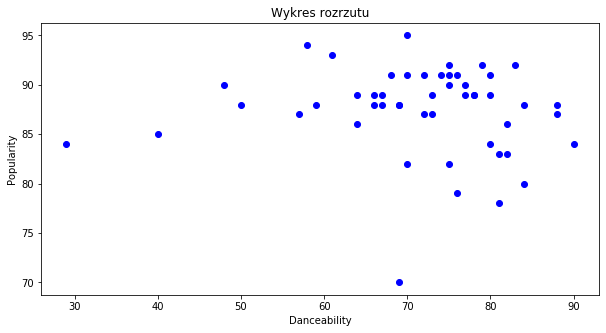

(-0.07141325258733469, 0.6221356203236242)

In [30]:
###Wykres Danceability i Popularity
plt.figure(figsize=(10,5))

x = data["Danceability"]
y = data['Popularity']
plt.plot(x,y, "bo")
plt.xlabel("Danceability")
plt.ylabel("Popularity")
plt.title('Wykres rozrzutu')
plt.show()
### rPearsona
st.pearsonr(data["Danceability"],data["Popularity"])

In [31]:
figsize =(20,10)


([<matplotlib.axis.XTick at 0x15c522a8e48>,
 <a list of 4 Text xticklabel objects>)

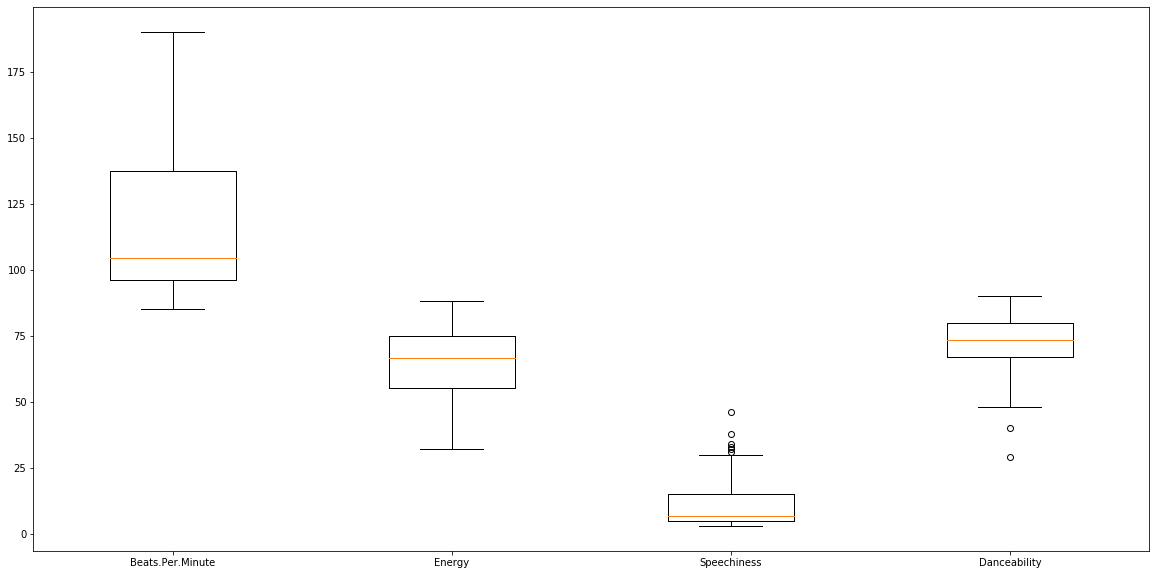

In [37]:
plt.figure(figsize = (20,10))
plt.boxplot([data["Beats.Per.Minute"],data["Energy"],data["Speechiness."],data["Danceability"]])
plt.xticks([1, 2, 3, 4], ['Beats.Per.Minute', 'Energy', 'Speechiness', 'Danceability' ])
